<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Predicciones_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos liberias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as ss
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
import sys
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [ ]:
df = pd.read_excel("Sales_Data.xlsx")

In [ ]:
df.head()

,Order Date,Sales
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


In [ ]:
df.tail()

,Order Date,Sales
43,2018-08-01,62837.8480
44,2018-09-01,86152.8880
45,2018-10-01,77448.1312
46,2018-11-01,117938.1550
47,2018-12-01,83030.3888


In [ ]:
df_copia = df.copy()
df_copia

,Order Date,Sales
0,2015-01-01,14205.7070
1,2015-02-01,4519.8920
2,2015-03-01,55205.7970
3,2015-04-01,27906.8550
4,2015-05-01,23644.3030
5,2015-06-01,34322.9356
6,2015-07-01,33781.5430
7,2015-08-01,27117.5365
8,2015-09-01,81623.5268
9,2015-10-01,31453.3930


Análisis exploratorio de datos (EDA):

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Tipo de datos y revisión de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  48 non-null     datetime64[ns]
 1   Sales       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


In [ ]:
df.columns

Index(['Order Date', 'Sales'], dtype='object')

In [ ]:
df.shape

(48, 2)

In [ ]:
#Revisión de valores nulos
df.value_counts()

Order Date  Sales      
2015-01-01  14205.7070     1
2015-02-01  4519.8920      1
2017-03-01  51165.0590     1
2017-04-01  38679.7670     1
2017-05-01  56656.9080     1
2017-06-01  39724.4860     1
2017-07-01  38320.7830     1
2017-08-01  30542.2003     1
2017-09-01  69193.3909     1
2017-10-01  59583.0330     1
2017-11-01  79066.4958     1
2017-12-01  95739.1210     1
2018-01-01  43476.4740     1
2018-02-01  19920.9974     1
2018-03-01  58863.4128     1
2018-04-01  35541.9101     1
2018-05-01  43825.9822     1
2018-06-01  48190.7277     1
2018-07-01  44825.1040     1
2018-08-01  62837.8480     1
2018-09-01  86152.8880     1
2018-10-01  77448.1312     1
2018-11-01  117938.1550    1
2017-02-01  22978.8150     1
2017-01-01  18542.4910     1
2016-12-01  74543.6012     1
2015-12-01  68167.0585     1
2015-03-01  55205.7970     1
2015-04-01  27906.8550     1
2015-05-01  23644.3030     1
2015-06-01  34322.9356     1
2015-07-01  33781.5430     1
2015-08-01  27117.5365     1
2015-09-01  81623.5

In [ ]:
#Revision valores faltantes
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
#DRevision de medidas estadisticas para Sales
df["Sales"].describe()

count        48.000000
mean      47115.349640
std       24978.687305
min        4519.892000
25%       29621.712625
50%       39202.126500
75%       64391.969125
max      117938.155000
Name: Sales, dtype: float64

In [ ]:
#Revisamos correlacciones
df.corr()

,Order Date,Sales
Order Date,1.000000,0.497792
Sales,0.497792,1.000000


La tabla nos indica correlacciones positivas

In [ ]:
df1 = df[df.duplicated()]

In [ ]:
print(f"Duplicados: {df1}")

Duplicados: Empty DataFrame
Columns: [Order Date, Sales]
Index: []


In [ ]:
# Acceder a componentes de la fecha
df['Año'] = df['Order Date'].dt.year
df['Mes'] = df['Order Date'].dt.month
df['Día'] = df['Order Date'].dt.day

In [ ]:
# Filtrar por fecha
df_filtrado = df[df['Order Date'] > '2017-06-01']
print(df_filtrado)

   Order Date        Sales  Mes  Día   Año
30 2017-07-01   38320.7830    7    1  2017
31 2017-08-01   30542.2003    8    1  2017
32 2017-09-01   69193.3909    9    1  2017
33 2017-10-01   59583.0330   10    1  2017
34 2017-11-01   79066.4958   11    1  2017
35 2017-12-01   95739.1210   12    1  2017
36 2018-01-01   43476.4740    1    1  2018
37 2018-02-01   19920.9974    2    1  2018
38 2018-03-01   58863.4128    3    1  2018
39 2018-04-01   35541.9101    4    1  2018
40 2018-05-01   43825.9822    5    1  2018
41 2018-06-01   48190.7277    6    1  2018
42 2018-07-01   44825.1040    7    1  2018
43 2018-08-01   62837.8480    8    1  2018
44 2018-09-01   86152.8880    9    1  2018
45 2018-10-01   77448.1312   10    1  2018
46 2018-11-01  117938.1550   11    1  2018
47 2018-12-01   83030.3888   12    1  2018


In [ ]:
df_filtrado.shape

(18, 5)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), errors='coerce')
df = df.drop(['Año', 'Mes'], axis=1)
df = df.set_index('Order Date')
df

,Sales,Día
Order Date,,
2015-01-01,14205.7070,1
2015-02-01,4519.8920,1
2015-03-01,55205.7970,1
2015-04-01,27906.8550,1
2015-05-01,23644.3030,1
2015-06-01,34322.9356,1
2015-07-01,33781.5430,1
2015-08-01,27117.5365,1
2015-09-01,81623.5268,1


In [ ]:
# Descomponer la serie de tiempo en componentes
result = seasonal_decompose(df['Sales'], model='additive')

In [ ]:
print(result)

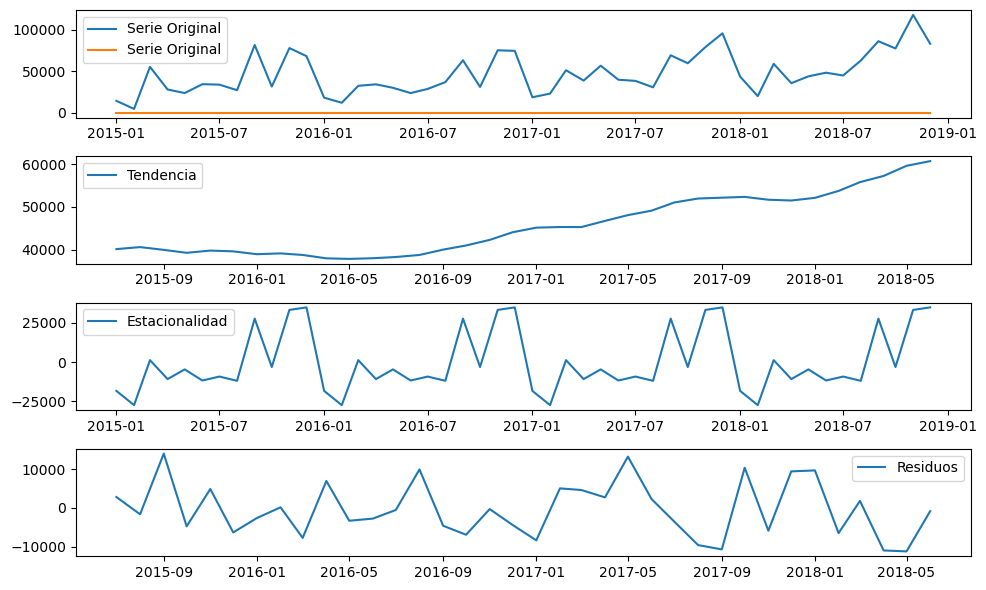

CPU times: total: 1.2 s
Wall time: 1.31 s


In [ ]:
%%time
# Descomponer la serie de tiempo en componentes
result = seasonal_decompose(df["Sales"], model='additive')

# Graficar los componentes
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df, label='Serie Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()


<Axes: xlabel='Order Date'>

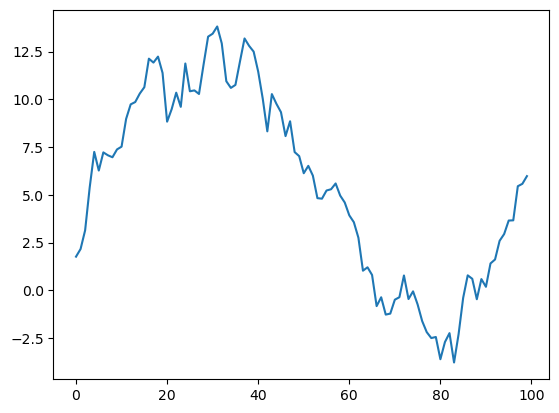

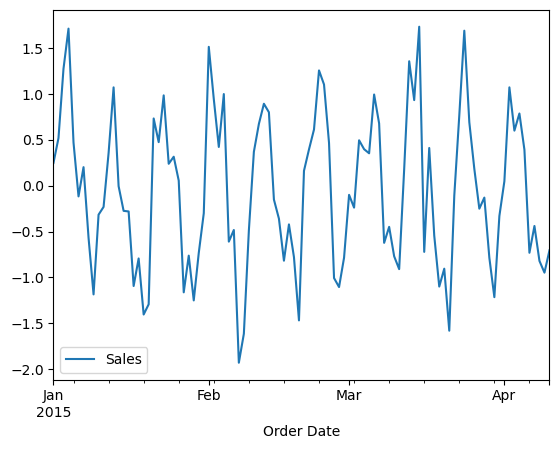

In [ ]:
# Generar una serie de tiempo ficticia
np.random.seed(0)
n = 100
time_series_rand = np.cumsum(np.random.randn(n))

# Generar una serie de tiempo estacionaria
np.random.seed(42)
time_index = pd.date_range(start='2015-01-01', periods=100, freq='D')
seasonal_data = np.sin(2 * np.pi * 0.1 * np.arange(100))
noise = np.random.normal(0, 0.5, size=100)
time_series = seasonal_data + noise

# Crear un DataFrame de pandas
data = pd.DataFrame({'Order Date': time_index, 'Sales': time_series})
data.set_index('Order Date', inplace=True)

plt.plot(time_series_rand)

data.plot()

In [ ]:
print(time_series_rand)

[ 1.76405235  2.16420955  3.14294754  5.38384074  7.25139873  6.27412085
  7.22420927  7.07285206  6.96963321  7.38023171  7.52427528  8.97854879
  9.73958651  9.86126153 10.30512476 10.63879909 12.13287816 11.9277199
 12.2407876  11.38669186  8.83370204  9.48732064 10.35175684  9.60959182
 11.87934644 10.42498077 10.47073928 10.28355543 11.81633465 13.28569342
 13.44064084 13.81880336 12.93101762 10.95022115 10.602309   10.75865797
 11.98894865 13.1913285  12.80400168 12.50169893 11.45314596 10.03312803
  8.32685784 10.27763323  9.76798105  9.32990675  8.07711139  8.85460174
  7.2407039   7.02796362  6.13249705  6.51939955  6.00859441  4.82796223
  4.79978     5.22811187  5.2946291   5.59710099  4.9627789   4.60003773
  3.92757729  3.56802412  2.75487784  1.02859524  1.20602138  0.80424045
 -0.8259579  -0.36317565 -1.27047401 -1.21852861 -0.48943805 -0.36045514
  0.77894554 -0.45588028 -0.05353864 -0.73834873 -1.60914588 -2.18799554
 -2.49954807 -2.44338273 -3.60853257 -2.70770608 -2.

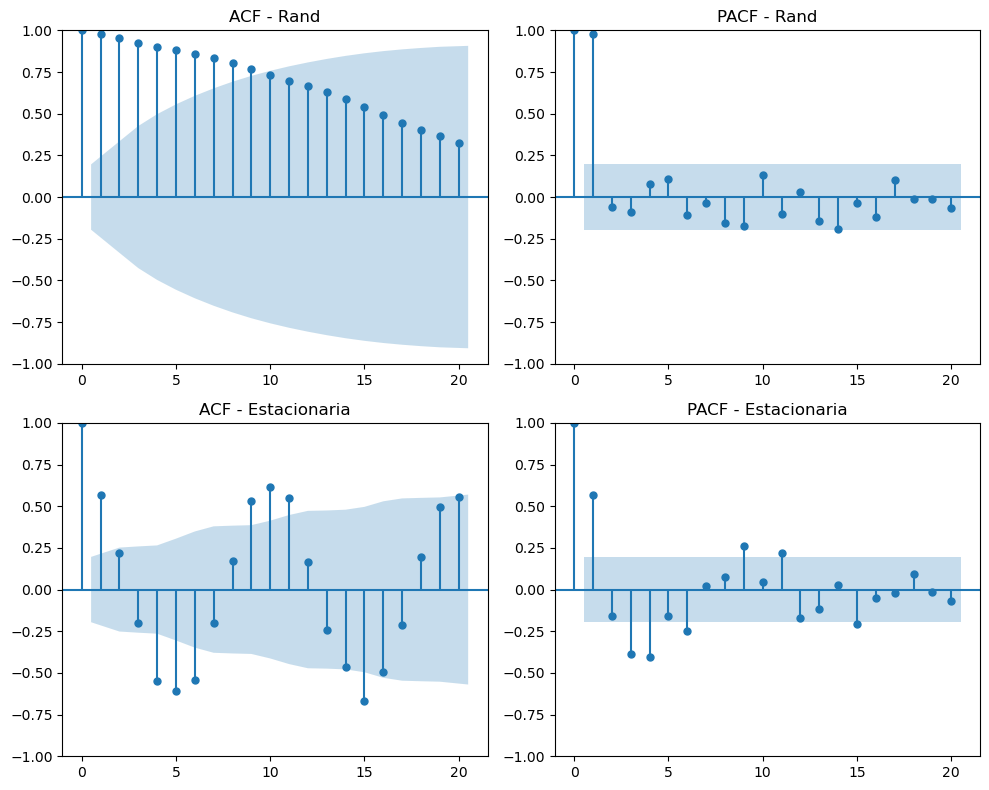

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1 - ACF de 'time_series_rand'
plot_acf(time_series_rand, lags=20, title="ACF - Rand", alpha=0.05, ax=axes[0, 0])

# Subplot 2 - PACF de 'time_series_rand'
plot_pacf(time_series_rand, lags=20, title="PACF - Rand", alpha=0.05, ax=axes[0, 1])

# Subplot 3 - ACF de 'data'
plot_acf(data, lags=20, title="ACF - Estacionaria", alpha=0.05, ax=axes[1, 0])

# Subplot 4 - PACF de 'data'
plot_pacf(data, lags=20, title="PACF - Estacionaria", alpha=0.05, ax=axes[1, 1])

# Ajustar el espaciado entre subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

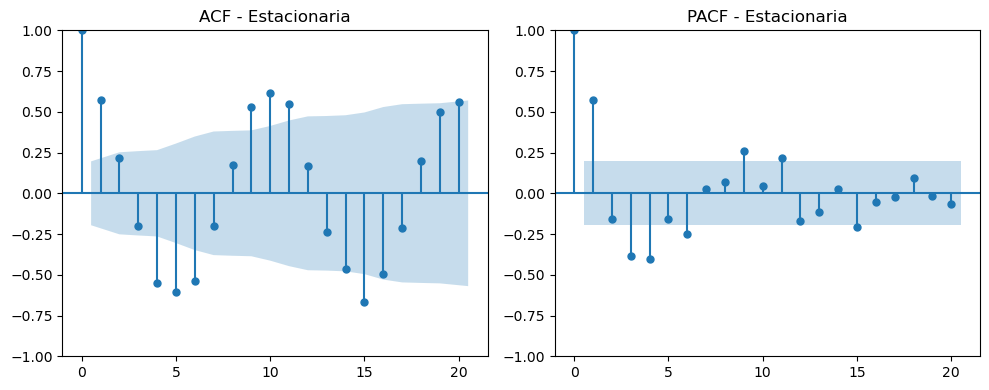

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Subplot 1 - ACF de 'data'
plot_acf(data, lags=20, title="ACF - Estacionaria", alpha=0.05, ax=axes[0])

# Subplot 2 - PACF de 'data'
plot_pacf(data, lags=20, title="PACF - Estacionaria", alpha=0.05, ax=axes[1])

# Ajustar el espaciado entre subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
p = 3
q = 2

In [ ]:
# Realizar el test de Dickey-Fuller
result = adfuller(df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [ ]:
result

(-4.416136761430769,
 0.00027791039276670623,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 847.3050446881931)

Ho = serie no es estacionaria

H1 = serie es estacionaria

Sí p-value < 0,05 --> se rechaza Ho

Para este caso, p-value > 0,05 --> NO se rechaza Ho, por lo tanto, serie no es estacionaria, aplicamos diferenciación (d=1) para lograr la estacionalidad.

In [ ]:
d = 1

In [ ]:
# Ajustar el modelo ARIMA con los valores seleccionados
model_arima = ARIMA(df['Sales'], order=(p, d, q))
model_arima_fit = model_arima.fit()

C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters

In [ ]:
model_ar = ARIMA(data, order=(p, 0, 0))
model_ar_fit = model_ar.fit()

model_ma = ARIMA(data, order=(0, 0, q))
model_ma_fit = model_ma.fit()

C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\.ms-ad\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

In [ ]:
# Ajustar el índice de predicción AR para que coincida en longitud con las predicciones
index_pred_ar = df.index[p:]
index_pred_ar = index_pred_ar[:len(predictions_ar)]
print(len(index_pred_ar))

45


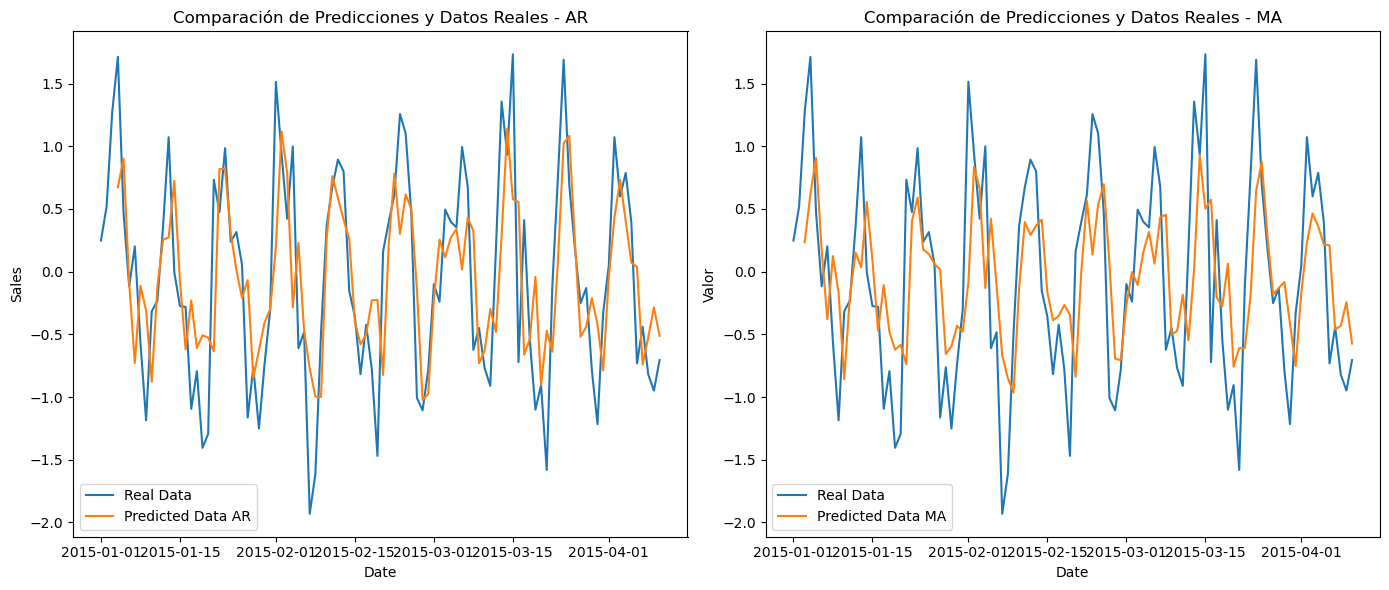

In [ ]:
# Crear una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1 - Gráfico izquierdo
axes[0].plot(data.index, data['Sales'], label='Real Data')
axes[0].plot(data.index[p:], predictions_ar, label='Predicted Data AR')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales')
axes[0].set_title('Comparación de Predicciones y Datos Reales - AR')
axes[0].legend()

# Subplot 2 - Gráfico derecho
axes[1].plot(data.index, data['Sales'], label='Real Data')
axes[1].plot(data.index[q:], predictions_ma, label='Predicted Data MA')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Valor')
axes[1].set_title('Comparación de Predicciones y Datos Reales - MA')
axes[1].legend()

# Ajustar el espaciado entre subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Hacer predicciones
predictions_arima = model_arima_fit.predict(start=d, end=len(data)-1)

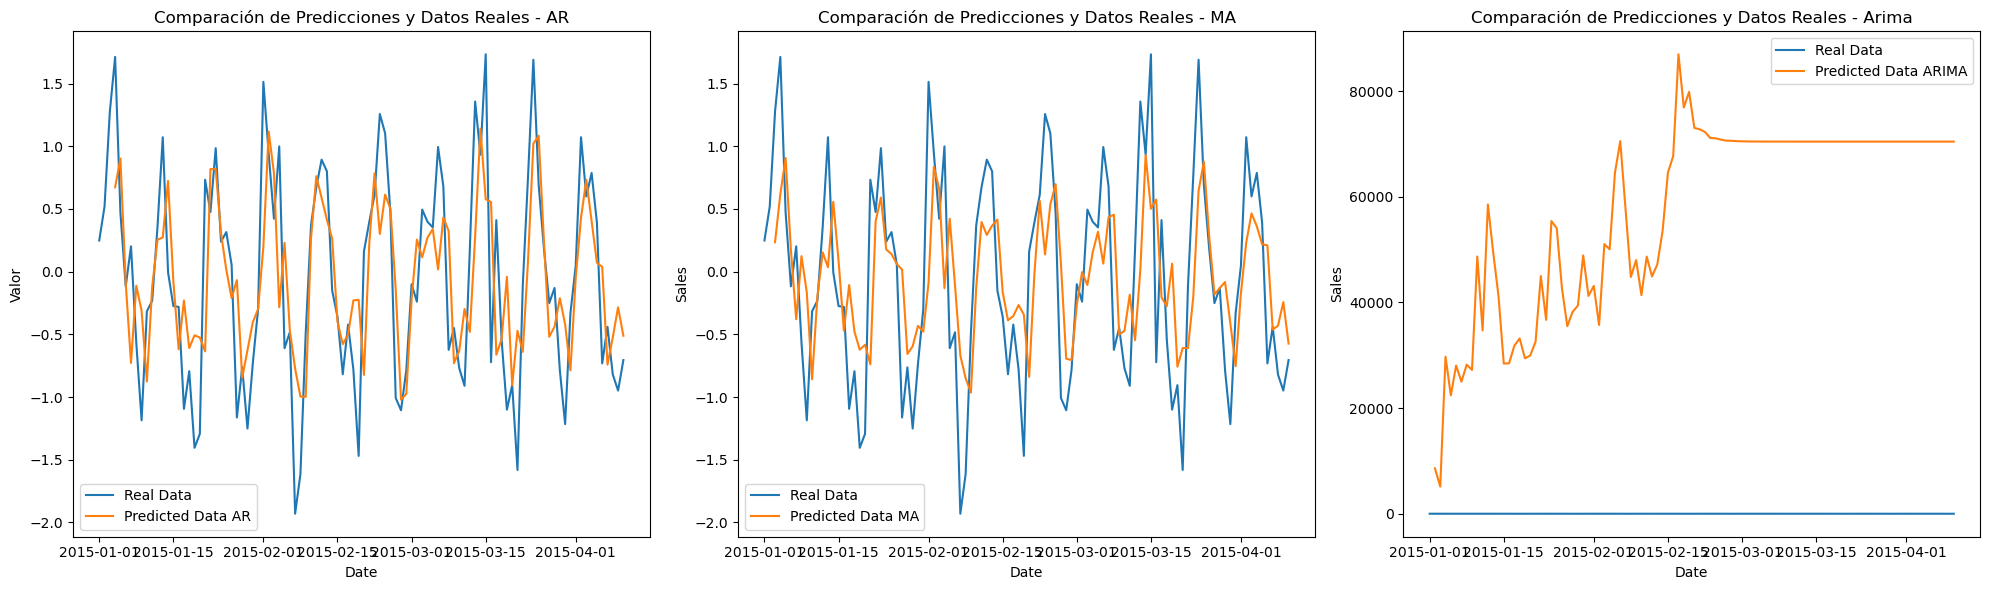

In [ ]:
# Crear una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Subplot 1 - Gráfico izquierdo
axes[0].plot(data.index, data['Sales'], label='Real Data')
axes[0].plot(data.index[p:], predictions_ar, label='Predicted Data AR')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Valor')
axes[0].set_title('Comparación de Predicciones y Datos Reales - AR')
axes[0].legend()

# Subplot 2 - Gráfico derecho
axes[1].plot(data.index, data['Sales'], label='Real Data')
axes[1].plot(data.index[q:], predictions_ma, label='Predicted Data MA')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales')
axes[1].set_title('Comparación de Predicciones y Datos Reales - MA')
axes[1].legend()


# Subplot 3 - Gráfico derecho
axes[2].plot(data.index, data['Sales'], label='Real Data')
axes[2].plot(data.index[d:], predictions_arima, label='Predicted Data ARIMA')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Sales')
axes[2].set_title('Comparación de Predicciones y Datos Reales - Arima')
axes[2].legend()

# Ajustar el espaciado entre subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Calcular las métricas para el modelo AR
mse_ar = mse(data['Sales'][p:], predictions_ar)
rmse_ar = rmse(data['Sales'][p:], predictions_ar)
mae_ar = meanabs(data['Sales'][p:], predictions_ar)

# Calcular las métricas para el modelo MA
mse_ma = mse(data['Sales'][q:], predictions_ma)
rmse_ma = rmse(data['Sales'][q:], predictions_ma)
mae_ma = meanabs(data['Sales'][q:], predictions_ma)

# Calcular las métricas para el modelo ARIMA
mse_arima = mse(data['Sales'][d:], predictions_arima)
rmse_arima = rmse(data['Sales'][d:], predictions_arima)
mae_arima = meanabs(data['Sales'][d:], predictions_arima)

# Imprimir las métricas para cada modelo
print("Métricas del modelo AR:")
print(f"MSE: {mse_ar:.2f}")
print(f"RMSE: {rmse_ar:.2f}")
print(f"MAE: {mae_ar:.2f}")
print()

print("Métricas del modelo MA:")
print(f"MSE: {mse_ma:.2f}")
print(f"RMSE: {rmse_ma:.2f}")
print(f"MAE: {mae_ma:.2f}")
print()

print("Métricas del modelo ARIMA:")
print(f"MSE: {mse_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"MAE: {mae_arima:.2f}")

Métricas del modelo AR:
MSE: 0.39
RMSE: 0.63
MAE: 0.50

Métricas del modelo MA:
MSE: 0.46
RMSE: 0.68
MAE: 0.54

Métricas del modelo ARIMA:
MSE: 3593182106.29
RMSE: 59943.16
MAE: 57219.83


Las métricas de AR (en primer lugar) y MA son más precisas que ARIMA, pues contienen valores más bajos.